In [1]:
import sys
sys.path.append('../../../')
import RdPCA.src.model as rdpca

import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt

from scipy.io import mmread
from openTSNE import TSNE

In [2]:
name = 'muraro'
exp_data = pd.read_csv('../../data/%s/matrix.csv' % name, index_col=0)
hvg = pd.read_csv('../../data/%s/hvg.vst.csv' % name, index_col=0)['x'].values
exp_data_meta = pd.read_csv('../../data/%s/meta.csv' % name, index_col=0)
size_factor = exp_data_meta['nCount_RNA']/exp_data_meta['nCount_RNA'].mean()
donor = [x.split('-')[0] for x in exp_data_meta.index]

In [5]:
device_cuda_list = [torch.device("cuda:{}".format(i)) for i in range(6)[::-1]]
torch.set_default_tensor_type(torch.FloatTensor)
dtype = torch.float32
data = exp_data
expr_mat = torch.tensor(data.T.loc[:,hvg[:2000]].values, dtype=dtype)
cc_mat = torch.zeros((expr_mat.shape[0],2), dtype=dtype)
sf = torch.tensor(size_factor, dtype=dtype)
batch_mat = torch.tensor(pd.get_dummies(donor, drop_first=True).values, dtype=dtype)
device = device_cuda_list[3]

In [10]:
import imp
imp.reload(rdpca)
torch.manual_seed(0)
n_lat = 30
red = rdpca.fit_pca_linear(expr_mat, n_lat, cc_mat, sf, batch_mat, device=device)

step 0: loss -14269.35
step 50: loss -20818.50
step 100: loss -21060.63
step 150: loss -21095.18


In [6]:
np.savetxt('rdpca.csv', red.detach().cpu().numpy(), delimiter=',')

# RdPCA

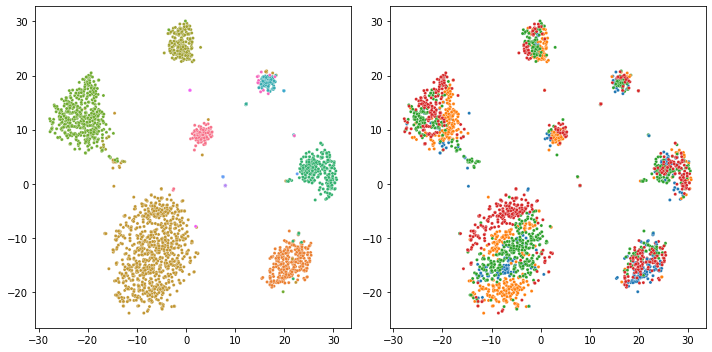

In [15]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(red.detach().cpu().numpy())

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [16]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_rdpca.csv')

# PCA

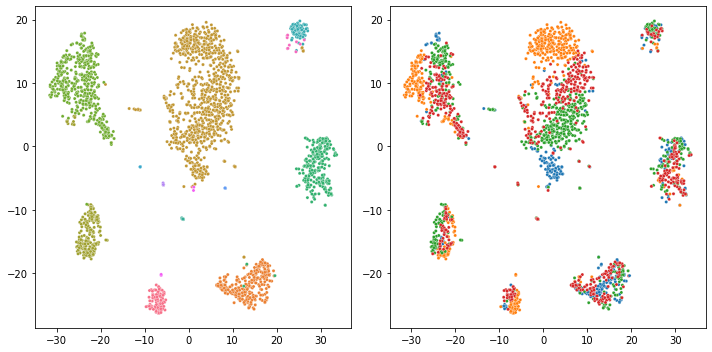

In [17]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('pca.csv', index_col=0).iloc[:,:30].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [18]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_pca.csv')

# SCTransform

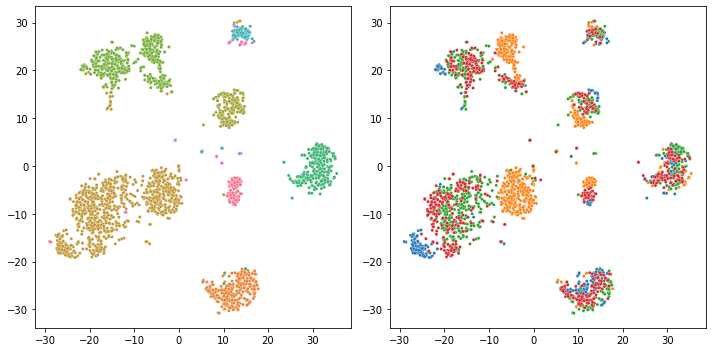

In [19]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('sct.csv', index_col=0).iloc[:,:30].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [20]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_sct.csv')

# GLM-PCA

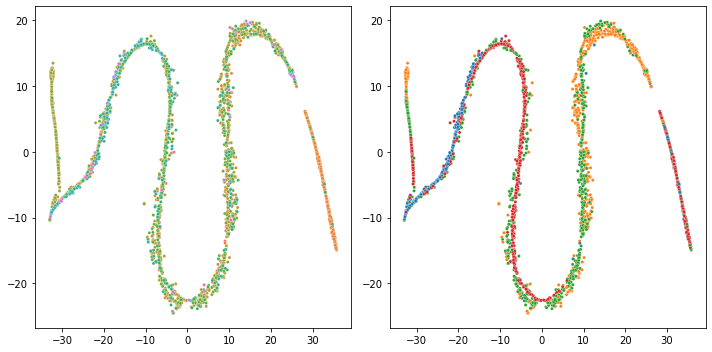

In [21]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('glmpca.csv', index_col=0).iloc[:,:30].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [22]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_glmpca.csv')

# ZINB-WaVE

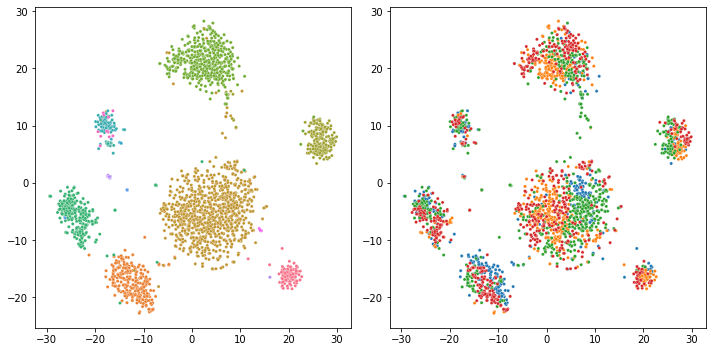

In [23]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('zinbwave.csv', index_col=0).iloc[:,:30].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [24]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_zinbwave.csv')

# Batch first RdPCA

In [25]:
import imp
imp.reload(rdpca)
torch.manual_seed(0)
n_lat = 30
red_batch_first = rdpca.fit_pca_linear_batch_first(expr_mat, n_lat, cc_mat, sf, batch_mat, device=device)

step 0: loss -14269.35
step 50: loss -15163.69
step 100: loss -15175.80
step 0: loss -15177.08
step 50: loss -20853.49
step 100: loss -21059.52


In [26]:
np.savetxt('rdpca_batch_first.csv', red_batch_first.detach().cpu().numpy(), delimiter=',')

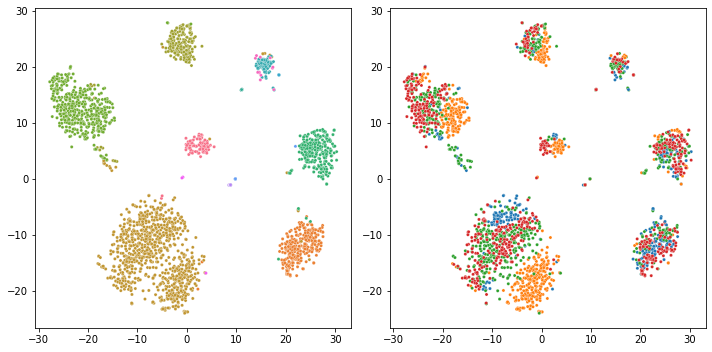

In [27]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(red_batch_first.detach().cpu().numpy())

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['celltype'], legend=False,
                s=10, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=donor, legend=False,
                s=10, ax=ax[1])
plt.tight_layout()

In [28]:
pd.DataFrame(tsne2, columns=['tSNE_1', 'tSNE_2']).to_csv('tsne_rdpca_batch_first.csv')